## Exercise in Photogrammetry I
## **Ex.9 : Essential Projective Geometry**
### Hand out: xx.xx.xxxx 
### Submission: xx.xx.xxxx 
### Points: 12

## A. Homogenous coordinates

In this task you need to find the intersection of two lines *$l_1$* and $l_2$. The line $l_1$ is defined by two points $x_1 = [98, 352]^T$ and $x_2 = [1548, 543]^T$. You can find the parameters of the line $l_2$ by computing the following $x_3$ and $x_4$ points.

The point $x_3$ is the intersection of the lines $m_1$ and $m_2$. The lines $m_1$ and $m_2$ are determined through the *Hesse normal form* with $\theta_1=35^{\circ}$, $d_1=1210$ and $\theta_2=138^{\circ}$, $d_2=978$. The point $x4$ can be found as an intersection point of lines $m_3$ and $m_4$.

The lines $m_3$and $m_4$ are given in the *intercept form*, where $x_0^3 = 1945$, $y_0^3 = 2761$ and $x_0^4 = -458$, $y_0^3 = 503$.

**Hints**:
- Hesse normal form: $cos(\theta)\cdot x + sin(\theta)\cdot y = d$ 
- Intercept form: $\frac{x}{x_0} + \frac{y}{y_0} = 1$

**Task**:
1. Find the intersection point $s$ of line $l_1$ and $l_2$ using **projective geometry** (homogenous coordinates). Print out the **euclidiean coordinates** of points $s$, $x_3$ and $x_4$. Finally, plot both lines l1 and l2 and verify your results.
<br> *(4 points)*

In [39]:
# import all required modules
import numpy as np
import matplotlib.pyplot as plt

# Known parameters
point_1 = np.array([98, 352])
point_2 = np.array([1548, 548])

# Hesse normal
theta1, d1 = 25, 1210
theta2, d2 = 138, 978

# intercepet form
m3_x, m3_y = 1945, 2761
m4_x, m4_y = -458, 503


In [36]:
def hesseNrmlLine(d, theta, theta_type="deg"):
    if theta_type == "deg":
        theta =  np.deg2rad(theta)
    line = np.array([np.cos(theta), np.sin(theta), -d]).T
    return line.squeeze()

def pointFrmLines(line1, line2):
    inter = np.cross(line1, line2)
    inter_HC = inter / inter[-1]
    
    return inter, inter_HC

def lineFrmPoints(point1, point2):
    inter = np.cross(point1, point2)
   
    return inter.squeeze()

def interceptForm(x, y):
    line = np.array([1/x, 1/y, -1]).T
    return line.squeeze()
    
def HcConvert(point):
    return np.append(point, [1])

In [37]:
# compute the coordinates of x_3 by using homogenous coordinates
line1 = hesseNrmlLine(theta1, d1)
line2 = hesseNrmlLine(theta2, d2)

x_3, x_3_HC = pointFrmLines(line1, line2)
print("Regular form: {}\n".format(np.round(x_3, 2))); print("Homogeneous form: {}\n".format(np.round(x_3_HC, 2)))


Regular form: [-130.17  -83.51    0.79]

Homogeneous form: [-165.19 -105.97    1.  ]



In [38]:
# compute the coordinates of x_4 by using homogenous coordinates
line1 = interceptForm(m3_x, m3_y)
line2 = interceptForm(m4_x, m4_y)

x_4, x_4_HC = pointFrmLines(line1, line2)
print("Regular form: {}\n".format(np.round(x_4, 3))); print("Homogeneous form: {}\n".format(np.round(x_4_HC, 2)))

Regular form: [0.002 0.003 0.   ]

Homogeneous form: [8.96820e+02 1.48793e+03 1.00000e+00]



In [27]:
# Given x_1 and x_2 compute the line l_1
x_1_hc = HcConvert(point_1)
x_2_hc = HcConvert(point_2)

l_1 = lineFrmPoints(x_1_hc, x_2_hc)
print("line 1: {}".format(l_1))

line 1: [   -196    1450 -491192]


In [28]:
# Given x_3 and x_4 compute the line l_2
l_2 = lineFrmPoints(x_3_HC , x_4_HC )
print("line 2: {}".format(l_2))

line 2: [  -1593.90513004    1062.00338404 -150747.37552314]


In [29]:
# Given l_1 and l_2 compute the intersection points s
s, s_HC = pointFrmLines(l_1, l_2)
print("Regular form: {}\n".format(np.round(s, 2))); print("Homogeneous form: {}\n".format(np.round(s_HC, 2)))

Regular form: [3.03063872e+08 7.53366963e+08 2.10300978e+06]

Homogeneous form: [144.11 358.23   1.  ]



In [47]:
# print out the euclidean coordinates of s, x_3 and x_4
print("Euclidean s: {}\n".format(np.round(s_HC[:2], 2)))
print("Euclidean x3: {}\n".format(np.round(x_3_HC[:2], 2)))
print("Euclidean x4: {}\n".format(np.round(x_4_HC[:2], 2)))

Euclidean s: [144.11 358.23]

Euclidean x3: [-165.19 -105.97]

Euclidean x4: [ 896.82 1487.93]



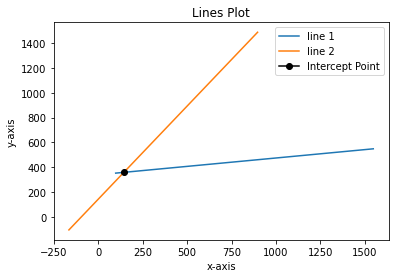

In [45]:
# finally, plot both lines l1 and l2 and verify your results
pIntX = [s_HC[0]]
pIntY = [s_HC[1]]

pLine1X = [point_1[0], point_2[0]] 
pLine1Y = [point_1[1], point_2[1]]

pLine2X = [x_3_HC[0], x_4_HC[0]]
pLine2Y = [x_3_HC[1], x_4_HC[1]]

# plotting lines
plt.plot(pLine1X, pLine1Y, label="line 1")
plt.plot(pLine2X, pLine2Y, label="line 2")
plt.plot(pIntX, pIntY, label="Intercept Point", color="black", marker="o", markerfacecolor="black")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Lines Plot")
plt.legend()
plt.show()

## B. Projective Geometry

You install a surveillance camera. This is a sensor width *principal point* $x_h = [400, 300]^T$ pel, *camera constant* $c = 550$ pel, *shear* $s = 0$ and *scale difference* $m = 0.0025$. You are also given the coordinates of two points in the world coordinate frame $X_1 = [1, 0, 2]$ m and $X_2 = [2, 3, 1]^T$ m.<br> *(8 points)*

**Tasks**:
1. Assuming the camera is located at the origin of the world with identical orientation, project the 3D points into the sensor coordinate system. Print out the *calibration matrix (K)*, *projection matrix (P)* and the *euclidean coordinates* of the sensor points. <br>*(5 points)*  
2. Let's assume the camera has changed its location to $X_0 = [0.4, 0, 10]^T$ and is rotated by $4^\circ$ around the Y-axis. Taking this transfomation into account, project again the given 3D points to the sensor coordinates and print out the *projection matrix (P)* and the *euclidean coordinates* of the sensor points.<br> *(3 points)*

## B1

In [48]:
# setup the calibration matrix K and print out your result
def affineCamMatrix(kCamera, shear, principalPoint, scaleDiff):
    k = [[kCamera, kCamera*shear, principalPoint[0]], [0, kCamera*(1 + scaleDiff), principalPoint[1]], [0,0, 1]]
    
    return np.array(k, dtype=object) 
calibMatrix = affineCamMatrix(550, 0, [400, 300], 0.0025)
print(calibMatrix)

[[550 0 400]
 [0 551.375 300]
 [0 0 1]]


In [86]:
# setup the projection matrix P and print out your result
def projMatrix(kMatrix, rot, pAxis):
    h3 = np.zeros((3, 4))
    h3[:3,:3] = np.eye(3)
    h3[:3,-1] = -1*pAxis
    
    return kMatrix @ rot @ h3
    
rot = np.eye(3)
pAxis = np.array([0, 0, 0], dtype=object)

pMat = projMatrix(calibMatrix, rot, pAxis)
print("Projection Matrix \n")
print(pMat)

Projection Matrix 

[[550.0 0.0 400.0 0.0]
 [0.0 551.375 300.0 0.0]
 [0.0 0.0 1.0 0.0]]


In [80]:
def senseCordConversion(pMatrix, point):
    # change to homogeneous coordinate
    point = HcConvert(point)
    sensorPoint = pMatrix @ point.T
    return (sensorPoint / sensorPoint[-1]).squeeze()

In [68]:
# project the 3D points into the sensor coordinate system and print out the euclidean sensor coordinates
X1 = np.array([1, 0, 2], dtype=object).squeeze()
X2 = np.array([2, 3, 1], dtype=object).squeeze()

sx = senseCordConversion(pMat, X1)
print("Euclidean sensor point 1: {}".format(sx[:2]))
sx = senseCordConversion(pMat, X2)
print("Euclidean sensor point 2: {}".format(sx[:2]))

Euclidean sensor point 1: [675.0 300.0]
Euclidean sensor point 2: [1500.0 1954.125]


## B2

In [74]:
def rot_matrix(angle, axis, type_="rad"):
        if type_ == "deg":
            angle =  np.deg2rad(angle)

        if axis == "z":
            return np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]], dtype=object)
        if axis == "x":
            return np.array([[1, 0, 0], [0, np.cos(angle), -np.sin(angle)], [0, np.sin(angle), np.cos(angle)]], dtype=object)
        if axis == "y":
            return np.array([[np.cos(angle), 0, np.sin(angle)],[0, 1, 0], [-np.sin(angle), 0, np.cos(angle)]], dtype=object)

In [87]:
# setup the projection matrix P and print out your result
rot = rot_matrix(4, "y", type_="deg")
pAxis = np.array([0.4, 0, 10], dtype=object)

pMat = projMatrix(calibMatrix, rot, pAxis)
print("Projection Matrix \n")
print(pMat)

Projection Matrix 

[[520.7576381452533 0.0 437.3916806631986 -4582.2198618900875]
 [-20.92694212323759 551.375 299.26921507794725 -2984.3213739301773]
 [-0.0697564737441253 0.0 0.9975640502598242 -9.947737913100593]]


In [88]:
# project the 3D points into the sensor coordinate system and print out the euclidean sensor coordinates
sx = senseCordConversion(pMat, X1)
print("Euclidean sensor point 1: {}".format(sx[:2]))
sx = senseCordConversion(pMat, X2)
print("Euclidean sensor point 2: {}".format(sx[:2]))

Euclidean sensor point 1: [397.2243037382189 299.99999999999994]
Euclidean sensor point 2: [341.4103224557692 118.0217828715128]
